In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np

In [2]:
file1 = "Data/TotalData2"
file2 = "Data/WeatherData"
df = pd.read_csv(file1)
weather = pd.read_csv(file2)
df.head()

In [4]:
mintemp_series = df.groupby('Day').min()['MinTemp']
maxtemp_series = df.groupby('Day').min()['MaxTemp']
amountof_crime = df['Day'].value_counts()
# percentage of the crime that occured over the whole time in 
season = df.groupby("Season")["Season"].count()
season = season / df['ID'].nunique()
print(season)

Season
Fall      0.249616
Spring    0.253961
Summer    0.275681
Winter    0.220742
Name: Season, dtype: float64


In [5]:
# 2,683,565 total crimes
# expected 670,891.25 per season gotten by taking total crime and dividing by amount of seasons
# the following gets us the actual crimecount that occurs in the season
df.groupby("Season")["Season"].count()

Season
Fall      609278
Spring    619882
Summer    672898
Winter    538801
Name: Season, dtype: int64

In [6]:
#Passing the previous information into a dataframe in order  to visualize better and run statistical tests
observed = pd.Series([674054, 686479, 746773, 576259], index=["Fall", "Spring", "Summer", "Winter"])
statistical_data = pd.DataFrame([observed]).T
statistical_data[1] = 670891.25
statistical_data = statistical_data.rename(columns={0:'Observed',1:'Expected'})
statistical_data

,Observed,Expected
Fall,674054,670891.25
Spring,686479,670891.25
Summer,746773,670891.25
Winter,576259,670891.25


In [7]:
#run a test for the critical value of our data
critical_value = stats.chi2.ppf(q = 0.99, df = 3)
critical_value

11.344866730144373

In [8]:
# run a test to find the chisquare and the pvalue
# because the chisquare (or statistic in output) is above the critical value 
# our observed v expected is statistically significant
stats.chisquare(statistical_data['Observed'], statistical_data['Expected'])

Power_divergenceResult(statistic=22308.06209016737, pvalue=0.0)

In [10]:
#next we will look at the same information but given the different temperature ranges instead of seasons
#amount of real crimes committed in each bin
df.groupby("Weather")["Weather"].count()

Weather
30-50 degrees      736425
50-70 degrees      748583
70-90 degrees      638905
Below freezing     308812
Over 90 degrees      8134
Name: Weather, dtype: int64

In [11]:
# these are the amount of crimes commited on the dats in a bin
days_in_bin = [335696, 820475, 814607, 704653, 8134]

In [12]:
# expected crime if it were evenly distributed
# this number is obtained by the equation below
(weather.groupby('Ranges')['Ranges'].count() / weather['Day'].nunique()) * 2683565

Ranges
30-50 degrees      844009.662902
50-70 degrees      789824.058864
70-90 degrees      645635.248118
Below freezing     396748.829569
Over 90 degrees      7347.200548
Name: Ranges, dtype: float64

In [16]:
df.head()

,ID,Date,Block,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,...,Year,Updated On,Location,Day,MinTemp,MaxTemp,Season,AvgTemp,Weather,Inside/Outside
0,10000092,2015-03-18 19:44:00,047XX W OHIO ST,BATTERY,AGGRAVATED: HANDGUN,STREET,False,False,1111,11.0,...,2015,02/10/2018 03:50:01 PM,"(41.891398861, -87.744384567)",2015-03-18,34,48,Spring,41.0,30-50 degrees,Outside
1,10000094,2015-03-18 23:00:00,066XX S MARSHFIELD AVE,OTHER OFFENSE,PAROLE VIOLATION,STREET,True,False,725,7.0,...,2015,02/10/2018 03:50:01 PM,"(41.773371528, -87.665319468)",2015-03-18,34,48,Spring,41.0,30-50 degrees,Outside
2,10000095,2015-03-18 22:45:00,044XX S LAKE PARK AVE,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,False,True,222,2.0,...,2015,02/10/2018 03:50:01 PM,"(41.81386068, -87.596642837)",2015-03-18,34,48,Spring,41.0,30-50 degrees,Inside
3,10000096,2015-03-18 22:30:00,051XX S MICHIGAN AVE,BATTERY,SIMPLE,APARTMENT,False,False,225,2.0,...,2015,02/10/2018 03:50:01 PM,"(41.800802415, -87.622619343)",2015-03-18,34,48,Spring,41.0,30-50 degrees,Inside
4,10000097,2015-03-18 21:00:00,047XX W ADAMS ST,ROBBERY,ARMED: HANDGUN,SIDEWALK,False,False,1113,11.0,...,2015,02/10/2018 03:50:01 PM,"(41.878064761, -87.743354013)",2015-03-18,34,48,Spring,41.0,30-50 degrees,Outside


In [20]:
#dates in the entirety
#weather['Day'].nunique()
df.groupby('Weather')['Day'].nunique()

Weather
30-50 degrees      919
50-70 degrees      860
70-90 degrees      703
Below freezing     432
Over 90 degrees      8
Name: Day, dtype: int64

In [21]:
df.groupby('Weather')['Day'].nunique() / df['Day'].nunique()

Weather
30-50 degrees      0.314511
50-70 degrees      0.294319
70-90 degrees      0.240589
Below freezing     0.147844
Over 90 degrees    0.002738
Name: Day, dtype: float64

In [16]:
#recap of previous cells
# we have a total of 2922 dates involved
#Below freezing      432
#30-50 degrees       919
#50-70 degrees       860
#70-90 degrees       703
#Over 90 degrees       8
# which gives us percentages of 
#Below freezing     0.147844
#30-50 degrees      0.314511
#50-70 degrees      0.294319
#70-90 degrees      0.240589
#Over 90 degrees    0.002738

In [22]:
#put the data into a dataset in order to view it and run statistical data
expected2 = pd.Series([392314.78, 857982.54, 779684.42, 646989.72, 6593.52], index=["Below freezing", "30-50", "50-70", "70-90", "Over 90"])
statistical_data2 = pd.DataFrame([expected2]).T
observed2 = [335696, 820475, 814607, 704653, 8134]
statistical_data2['Observed'] = observed2
statistical_data2 = statistical_data2.rename(columns={0:'Expected',1:"Observed"})
#statistical_data2['Days'] = [476, 1041, 946, 785, 8]
#statistical_data2['Percent'] = [14.6, 31.9, 29, 24.1, 0.2]
statistical_data2

,Expected,Observed
Below freezing,392314.78,335696
30-50,857982.54,820475
50-70,779684.42,814607
70-90,646989.72,704653
Over 90,6593.52,8134


In [23]:
# run critical value on the ranges
critical_value2 = stats.chi2.ppf(q = 0.99, df = 4)
critical_value2

13.276704135987622

In [24]:
#find the chisquare of the data
# this shows us that there is a statistical significance of the expected vs the observed
stats.chisquare(statistical_data2['Observed'], statistical_data2['Expected'])

Power_divergenceResult(statistic=16874.272626418733, pvalue=0.0)

In [25]:
# this is a df of the observed crime on these dates, the expected if crime was evenly distributed, and
# the percentage spike which shows us the percentage increase or decrease given a temperature range
statistical_data2['Percentage'] = (statistical_data2['Observed'] / statistical_data2['Expected']) *100

statistical_data2

,Expected,Observed,Percentage
Below freezing,392314.78,335696,85.568023
30-50,857982.54,820475,95.628403
50-70,779684.42,814607,104.479066
70-90,646989.72,704653,108.912550
Over 90,6593.52,8134,123.363545


In [35]:
#using this cell in order to create a dataframe which has ever date with crimes on that date, mintemp, and maxtemp
graphdict = {'Crimes':amountof_crime, 'MinTemp':mintemp_series, 'MaxTemp':maxtemp_series}
graphing1 = pd.DataFrame(graphdict)
graphing1.head()

,Crimes,MinTemp,MaxTemp
2010-01-01,1421,13,19
2010-01-02,793,9,13
2010-01-03,760,12,20
2010-01-04,855,15,23
2010-01-05,912,20,25


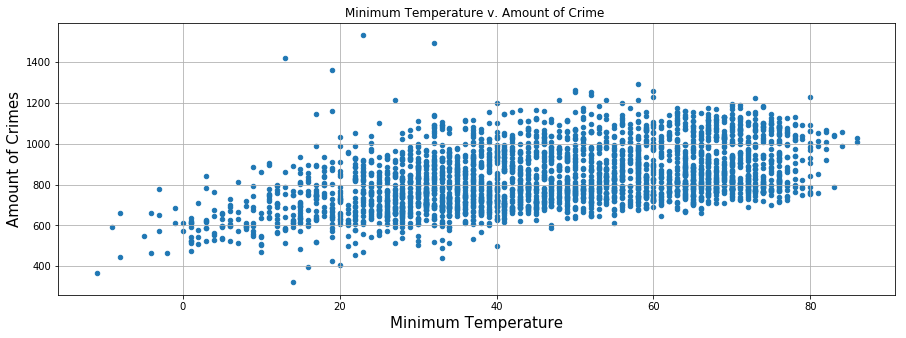

In [36]:
#temperature vs crime on a date
# we can see that there is a correlation between temperature and amount of crime
graphing1.plot(kind="scatter", x="MinTemp", y="Crimes", grid=True, figsize=(15,5),
              title="Minimum Temperature v. Amount of Crime ")
plt.xlabel("Minimum Temperature", fontsize=15)
plt.ylabel("Amount of Crimes", fontsize=15)
plt.show()

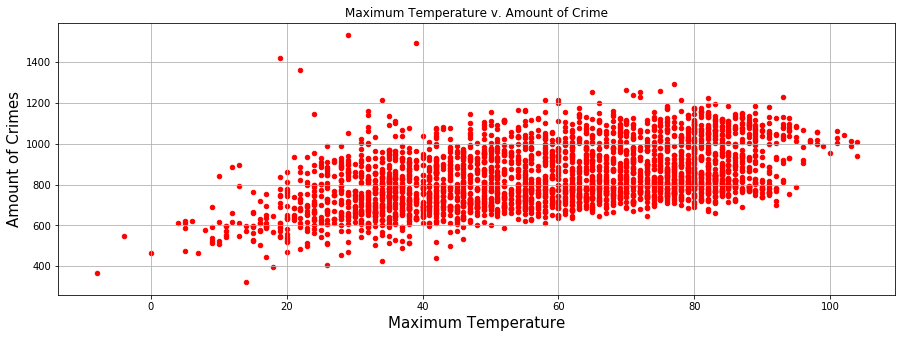

In [37]:
# we decided to graph the maximum temperature in order to be sure that we get the same general trend
graphing1.plot(kind="scatter", x="MaxTemp", y="Crimes", grid=True, figsize=(15,5),
              title="Maximum Temperature v. Amount of Crime", color='red')
plt.xlabel("Maximum Temperature", fontsize=15)
plt.ylabel("Amount of Crimes", fontsize=15)
plt.show()

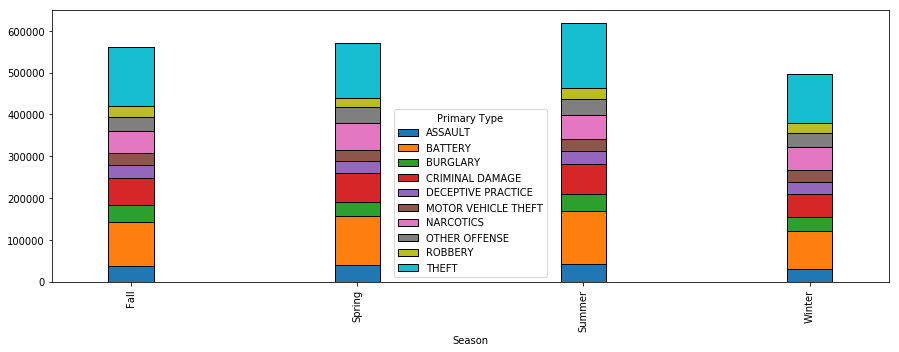

In [29]:
# This graph shows us a great analysis of the different types of crime in each season
# this is a good analysis of both amount of crime and the type of crime
crime_data_pt = df["Primary Type"].value_counts().head(10)
top_10 = list(crime_data_pt.index)
top_10_filter = df['Primary Type'].isin(top_10)
crime_top_10 = df.loc[top_10_filter, :]
crime_top_10["Primary Type"].unique()
new_crime = crime_top_10[["Season", 'Primary Type']]
crime_array = new_crime["Season"].unique()
final_crime = new_crime[new_crime["Season"].isin(crime_array)]
freq_table = pd.crosstab(final_crime['Season'], final_crime['Primary Type'])
freq_table.plot.bar(stacked=True,figsize=(15,5), edgecolor='black', width=(.2))

(-1.1144254721236257,
 1.1065635875040756,
 -1.1097350869007847,
 1.1004635758654926)

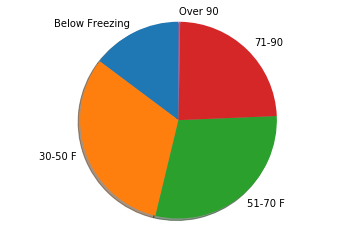

In [34]:
# this graph gives us an idea of how often a temperature range occurs over the course of the 8 years in this research
labels = ['Below Freezing','30-50 F','51-70 F', '71-90', 'Over 90']
sizes = [432,919,860,703,8]

fig1 = plt.pie(list(sizes),labels=labels,
       shadow=True, startangle=90)
plt.axis('equal')

In [44]:
#set up cell for following charts
winter_crimes = df.loc[df['Season'] == 'Winter']
spring_crimes = df.loc[df['Season'] == 'Spring']
summer_crimes = df.loc[df['Season'] == 'Summer']
fall_crimes = df.loc[df['Season'] == 'Fall']

w1 = winter_crimes.loc[winter_crimes['Inside/Outside'] == 'Inside']['ID'].count()
w2 = winter_crimes.loc[winter_crimes['Inside/Outside'] == 'Outside']['ID'].count()
sp1 = spring_crimes.loc[spring_crimes['Inside/Outside'] == 'Inside']['ID'].count()
sp2 = spring_crimes.loc[spring_crimes['Inside/Outside'] == 'Outside']['ID'].count()
su1 = summer_crimes.loc[summer_crimes['Inside/Outside'] == 'Inside']['ID'].count()
su2 = summer_crimes.loc[summer_crimes['Inside/Outside'] == 'Outside']['ID'].count()
f1 = fall_crimes.loc[fall_crimes['Inside/Outside'] == 'Inside']['ID'].count()
f2 = fall_crimes.loc[fall_crimes['Inside/Outside'] == 'Outside']['ID'].count()


c0 = df.loc[df['Weather'] == 'Below freezing']
c30 = df.loc[df['Weather'] == '30-50 degrees']
c50 = df.loc[df['Weather'] == '50-70 degrees']
c70 = df.loc[df['Weather'] == '70-90 degrees']
c90 = df.loc[df['Weather'] == 'Over 90 degrees']
c0i = c0.loc[c0['Inside/Outside'] == 'Inside']['ID'].count()
c0o = c0.loc[c0['Inside/Outside'] == 'Outside']['ID'].count()
c30i = c30.loc[c30['Inside/Outside'] == 'Inside']['ID'].count()
c30o = c30.loc[c30['Inside/Outside'] == 'Outside']['ID'].count()
c50i = c50.loc[c50['Inside/Outside'] == 'Inside']['ID'].count()
c50o = c50.loc[c50['Inside/Outside'] == 'Outside']['ID'].count()
c70i = c70.loc[c70['Inside/Outside'] == 'Inside']['ID'].count()
c70o = c70.loc[c70['Inside/Outside'] == 'Outside']['ID'].count()
c90i = c90.loc[c90['Inside/Outside'] == 'Inside']['ID'].count()
c90o = c90.loc[c90['Inside/Outside'] == 'Outside']['ID'].count()

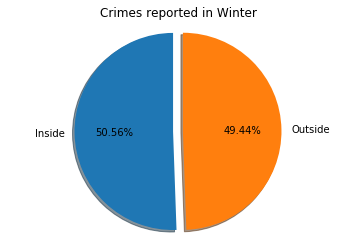

In [45]:
# this hows us that crime is relatively evenly divided during the winter time.
labels = ['Inside', 'Outside']
sizes = [w1, w2]
explode = (0, 0.1)
fig1 = plt.pie(list(sizes),labels=labels, explode=explode,autopct='%1.2f%%',
       shadow=True, startangle=90)
plt.title("Crimes reported in Winter")
plt.axis('equal')
plt.savefig('winterpie.png')

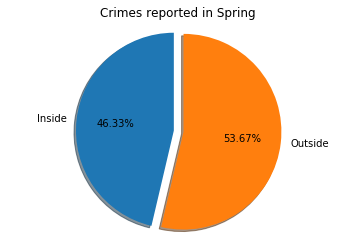

In [46]:
# we can see this slightly shift once we get to spring
labels = ['Inside', 'Outside']
sizes = [sp1, sp2]
explode = (0, 0.1)
fig1 = plt.pie(list(sizes),labels=labels, explode=explode,autopct='%1.2f%%',
       shadow=True, startangle=90)
plt.title("Crimes reported in Spring")
plt.axis('equal')
plt.savefig('springpie.png')

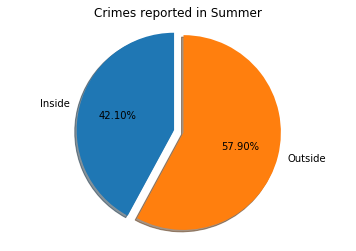

In [47]:
# this graph shows us that more and more crime is occuring outside once we get to summer
# given the nature of average crime in chicago this also tells us that more people are affected by it.
labels = ['Inside', 'Outside']
sizes = [su1, su2]
explode = (0, 0.1)
fig1 = plt.pie(list(sizes),labels=labels, explode=explode,autopct='%1.2f%%',
       shadow=True, startangle=90)
plt.title("Crimes reported in Summer")
plt.axis('equal')
plt.savefig('summerpie.png')

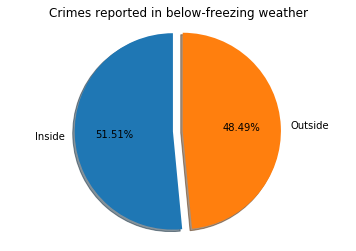

In [48]:
# this then gives us another look at the location of crime given the temperature on that date
labels = ['Inside', 'Outside']
sizes = [c0i, c0o]
explode = (0, 0.1)
fig1 = plt.pie(list(sizes),labels=labels, explode=explode,autopct='%1.2f%%',
       shadow=True, startangle=90)
plt.title("Crimes reported in below-freezing weather")
plt.axis('equal')

plt.savefig('freezingpie.png')



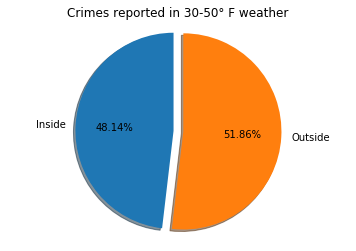

In [49]:
# we can see the shift when the temperature is slightly hotter


labels = ['Inside', 'Outside']
sizes = [c30i, c30o]
explode = (0, 0.1)
fig1 = plt.pie(list(sizes),labels=labels, explode=explode,autopct='%1.2f%%',
       shadow=True, startangle=90)
plt.title("Crimes reported in 30-50° F weather")
plt.axis('equal')

plt.savefig('30-50pie.png')

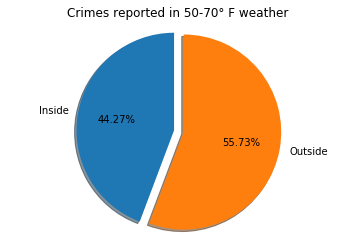

In [50]:
# we can see this trend continue given the next temperature range 
labels = ['Inside', 'Outside']
sizes = [c50i, c50o]
explode = (0, 0.1)
fig1 = plt.pie(list(sizes),labels=labels, explode=explode,autopct='%1.2f%%',
       shadow=True, startangle=90)
plt.title("Crimes reported in 50-70° F weather")
plt.axis('equal')
plt.savefig('50-70pie.png')

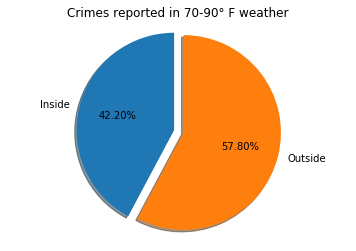

In [51]:
# again the trend continues 


labels = ['Inside', 'Outside']
sizes = [c70i, c70o]
explode = (0, 0.1)
fig1 = plt.pie(list(sizes),labels=labels, explode=explode,autopct='%1.2f%%',
       shadow=True, startangle=90)
plt.title("Crimes reported in 70-90° F weather")
plt.axis('equal')
plt.savefig('70-90pie.png')



In [ ]:
# lastly we see the data gives us our highest amount of crim ou